----

# Image Classification with Neural Networks

#### Anisha Singh (as229583), Antra Sinha (as224589), Hayoung Kim (hk26786), Meenakshi Sundaram (ms88544)

> ## Summary of the model

> 1. Network Architecture
> The neural network architecture is defined as a 'SimpleCNN' class.
> The architecture consists of:
> - A convolutional layer with 16 output channels, kernel size 3, and padding 1.
> - A max-pooling layer with kernel size 2 and stride 2.
> - A fully connected (linear) layer with 16 * 112 * 112 input features and 128 output features.
> - Another fully connected (linear) layer with 128 input features and the specified num_classes output features.

> 2. Training 
> - n of epochs = 10
> - learning rate = 0.0007
> - Outputs are calculated using forward propagation.
> - The loss is calculated and backpropagation is performed to update the model's parameters.

> 3. Optimization and Evaluation
> - The loss function is defined as Cross-Entropy Loss.
> - The Adam optimizer is used for parameter optimizati

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),        # Resize images to 224x224
    transforms.ToTensor(),                # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the pixel values
])

# Define dataset paths and create the dataset
root = '/Users/hayoung/Desktop/UTAUSTIN/Intro to ML/group assignment/EuroSAT'
full_dataset = datasets.ImageFolder(root=root, transform=data_transform)


In [3]:
# Get the class name of each numbered labels to recognize later
class_labels = {
    0: 'AnnualCrop',
    1: 'Forest',
    2: 'HerbaceousVegetation',
    3: 'Highway',
    4: 'Industrial',
    5: 'Pasture',
    6: 'PermanentCrop',
    7: 'Residential',
    8: 'River',
    9: 'SeaLake'
}
classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture','PermanentCrop','Residential','River', 'SeaLake']
class_idx_labels = dict()
for key, val in class_labels.items():
  class_idx_labels[val] = key

num_classes = len(class_labels.items())

class_idx_labels

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [4]:
# Calculate the sizes of the train and test datasets based on the 80/20 split
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Perform the random train-test split
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create train and test data loaders
batch_size = 64
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

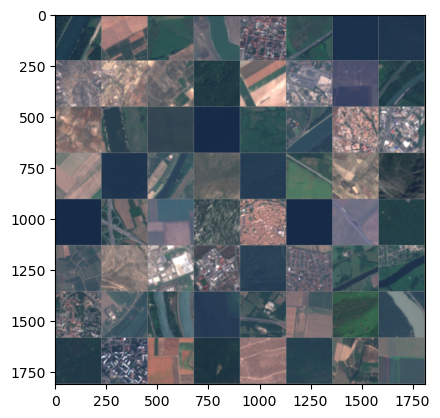

Labels: 8 6 5 8 7 3 9 9 2 6 6 1 0 4 0 8 6 8 9 9 5 8 7 4 0 9 8 2 1 3 6 2 9 3 0 2 7 9 3 1 6 2 4 4 1 7 8 8 7 8 8 9 3 0 1 8 1 7 0 1 2 1 6 0


In [5]:
# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:64]))
print('Labels:', ' '.join('%d' % labels[j] for j in range(64)))

In [6]:
# Define the neural network architecture
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 112 * 112, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 112 * 112)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set random seed for reproducibility
torch.manual_seed(42)

In [7]:
# define training hyperparameters
num_epochs = 10
learning_rate = 0.0007

# Initialize the model
model = SimpleCNN(num_classes)

# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the GPU if available

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Calculate the total number of training samples
total_train_samples = len(trainloader.dataset)

# Calculate the total number of iterations
total_iterations = num_epochs * (total_train_samples / batch_size)

# Print the total number of iterations
print(f"Total Iterations would be: {total_iterations}")

Total Iterations would be: 3375.0


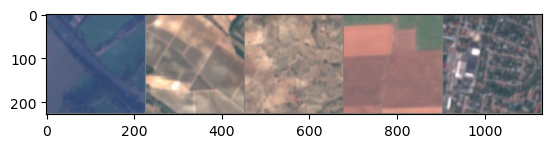

Predicted: 9 9 9 9 9


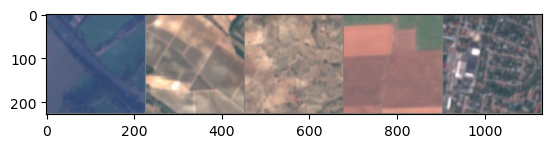

Predicted: 8 6 6 0 7


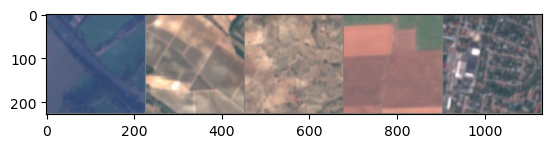

Predicted: 9 6 6 0 7


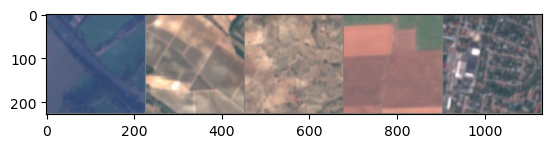

Predicted: 9 6 6 0 7
Epoch 1, Loss: 2.1384, Accuracy: 37.11%


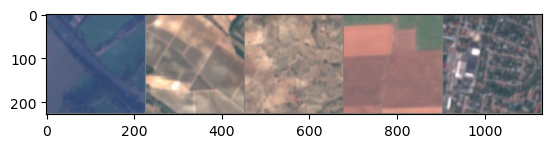

Predicted: 9 6 6 0 7


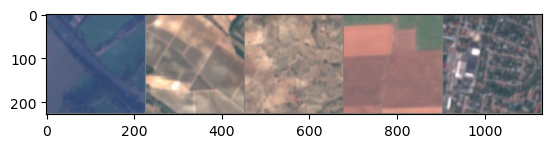

Predicted: 7 6 6 0 7


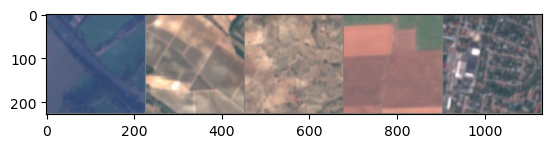

Predicted: 5 6 6 0 7


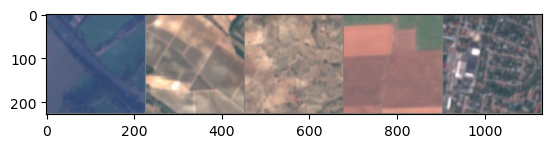

Predicted: 7 6 6 0 7
Epoch 2, Loss: 1.0946, Accuracy: 59.38%


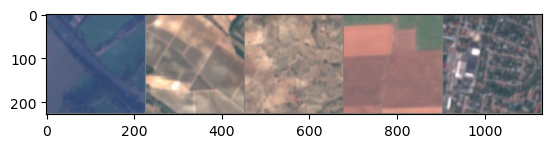

Predicted: 5 6 6 0 7


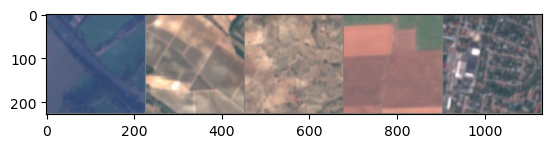

Predicted: 8 6 6 0 7


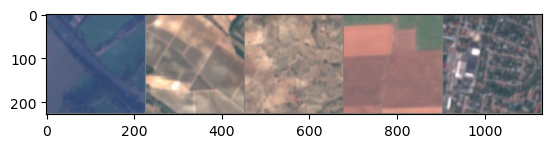

Predicted: 8 6 6 0 7


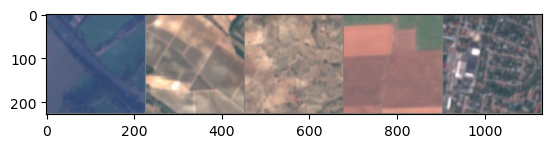

Predicted: 8 6 6 0 7
Epoch 3, Loss: 0.9664, Accuracy: 58.20%


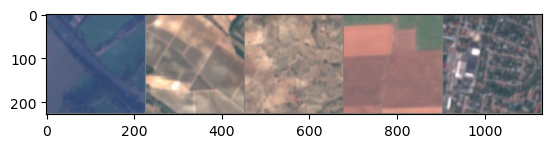

Predicted: 8 6 6 0 7


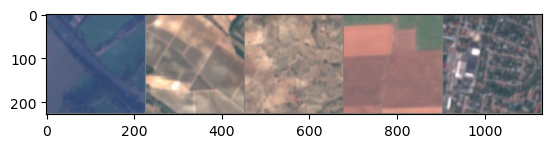

Predicted: 7 6 6 0 7


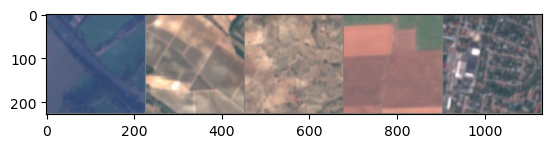

Predicted: 7 6 6 0 7


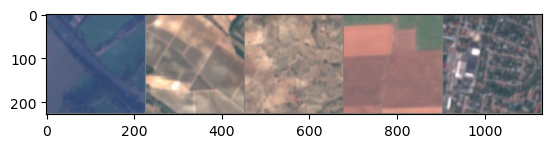

Predicted: 5 6 6 0 7
Epoch 4, Loss: 0.8691, Accuracy: 64.84%


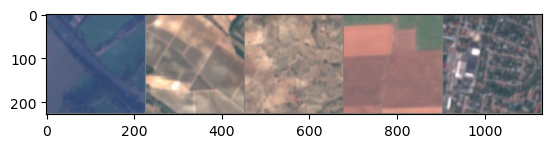

Predicted: 8 6 6 0 7


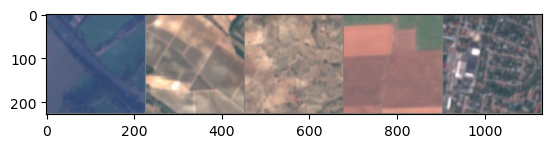

Predicted: 8 6 6 0 7


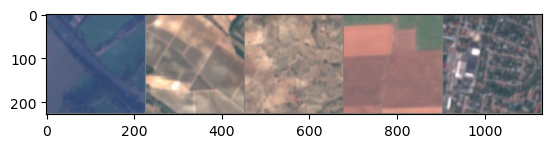

Predicted: 7 6 6 0 7


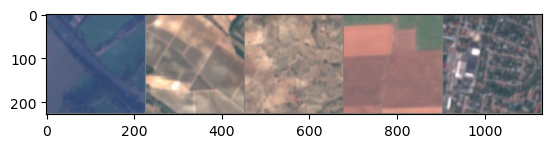

Predicted: 8 6 6 0 7
Epoch 5, Loss: 0.7949, Accuracy: 61.72%


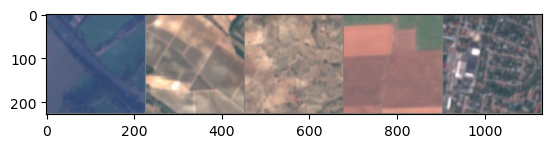

Predicted: 8 6 6 0 7


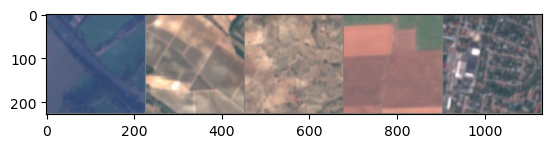

Predicted: 7 6 6 0 7


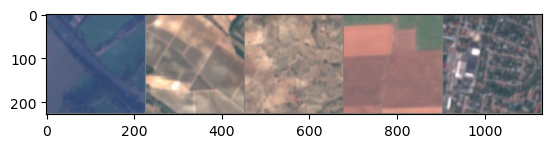

Predicted: 8 6 6 0 7


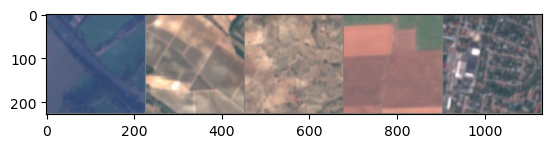

Predicted: 8 6 6 0 7
Epoch 6, Loss: 0.7273, Accuracy: 66.80%


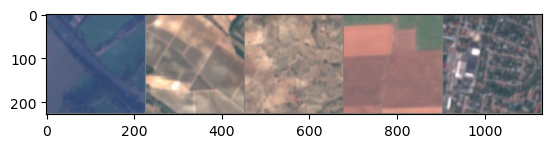

Predicted: 8 6 6 0 7


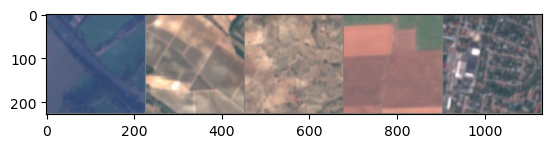

Predicted: 9 6 6 0 7


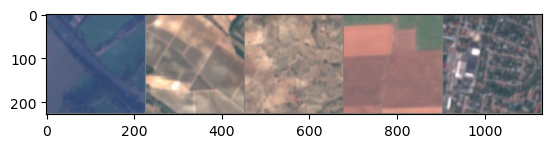

Predicted: 8 6 6 0 7


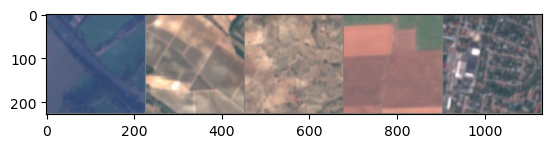

Predicted: 8 6 6 0 7
Epoch 7, Loss: 0.6633, Accuracy: 67.58%


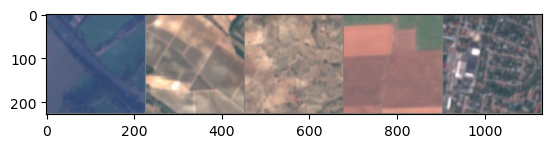

Predicted: 8 6 6 0 7


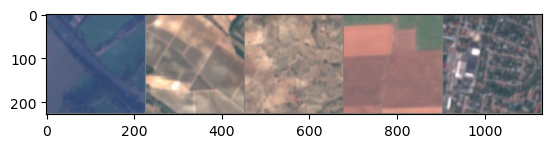

Predicted: 8 6 6 0 7


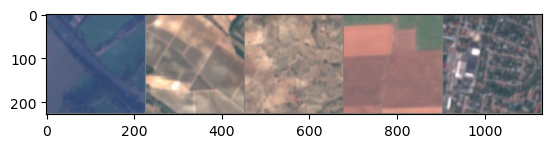

Predicted: 8 6 6 0 7


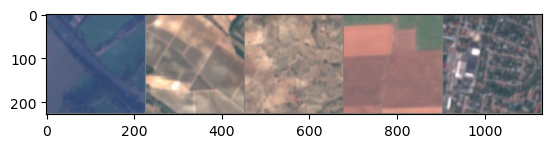

Predicted: 7 6 6 0 7
Epoch 8, Loss: 0.5901, Accuracy: 66.80%


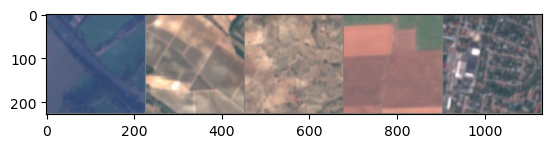

Predicted: 7 6 6 0 7


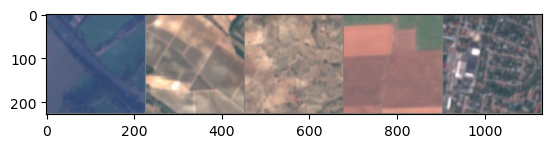

Predicted: 8 6 6 0 7


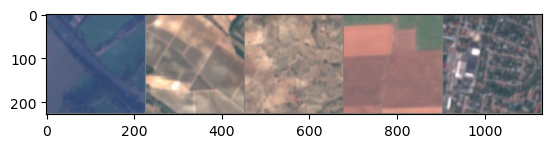

Predicted: 8 6 6 0 7


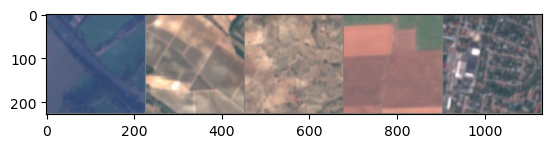

Predicted: 8 6 6 0 7
Epoch 9, Loss: 0.5311, Accuracy: 68.75%


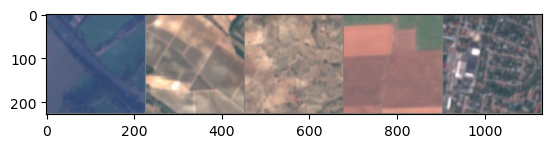

Predicted: 8 6 6 0 7


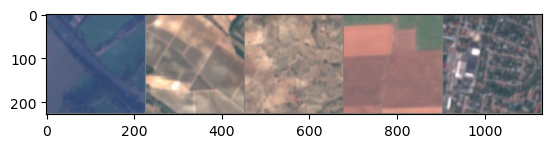

Predicted: 9 6 6 0 7


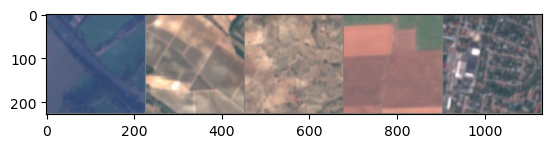

Predicted: 8 6 6 0 7


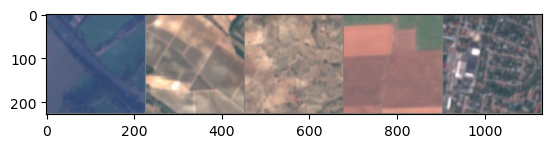

Predicted: 8 6 6 0 7
Epoch 10, Loss: 0.5037, Accuracy: 69.14%
Finished Training


In [8]:
testiter = iter(testloader)

# Lists to store the train accuracy and training loss 
accuracy = []
running_loss_list = []

# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = next(iter(testloader))
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                test_outputs = model(test_images)
                _, predicted = torch.max(test_outputs, 1)
                total_correct += (predicted == test_labels).sum().item()
                total_samples += test_labels.size(0)
                
                 # Display a grid of the first 5 test images and their predicted labels
                imshow(torchvision.utils.make_grid(test_images[:5].cpu()))
                print('Predicted:', ' '.join('%d' % predicted[j] for j in range(5)))

    # Print average loss for the epoch
    epoch_loss = running_loss / (i + 1)
    epoch_accuracy = total_correct / total_samples * 100
    running_loss_list.append(epoch_loss)
    accuracy.append(epoch_accuracy)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

print('Finished Training')

> Above you can see how the model predicted each image 

> ## The progress throughout each Epochs:
>   * Best train Accuracy was made during our final 10th epoch! 

>   - Epoch 1, Loss: 2.1384, Accuracy: 37.11%
>   - Epoch 2, Loss: 1.0946, Accuracy: 59.38%
>   - Epoch 3, Loss: 0.9664, Accuracy: 58.20%
>   - Epoch 4, Loss: 0.8691, Accuracy: 64.84%
>   - Epoch 5, Loss: 0.7949, Accuracy: 61.72%
>   - Epoch 6, Loss: 0.7273, Accuracy: 66.80%
>   - Epoch 7, Loss: 0.6633, Accuracy: 67.58%
>   - Epoch 8, Loss: 0.5901, Accuracy: 66.80%
>   - Epoch 9, Loss: 0.5311, Accuracy: 68.75%
>   - Epoch 10, Loss: 0.5037, Accuracy: 69.14%

Test Accuracy: 72.98%
Confusion Matrix:
tensor([[497.,   0.,  21.,  15.,   1.,  27.,  32.,   0.,   5.,   3.],
        [  4., 534.,  10.,   0.,   0.,  59.,   0.,   0.,   2.,   0.],
        [  3.,  11., 436.,  20.,   2.,  15.,  44.,  20.,   6.,   8.],
        [ 35.,   9.,  36., 282.,  12.,  24.,  22.,  28.,  39.,   0.],
        [  0.,   0.,   7.,  28., 445.,   0.,   1.,  35.,   1.,   0.],
        [  7.,   4.,   6.,   7.,   0., 380.,  22.,   1.,   3.,   3.],
        [ 52.,   0., 101.,  31.,   5.,  29., 281.,  18.,   6.,   0.],
        [  1.,   0.,  36.,  92.,  23.,   1.,  17., 447.,   3.,   0.],
        [ 16.,  14.,  15.,  70.,   4.,  22.,   9.,   4., 337.,   2.],
        [  4., 171.,   8.,   1.,   0.,  49.,   0.,   0.,  17., 302.]])


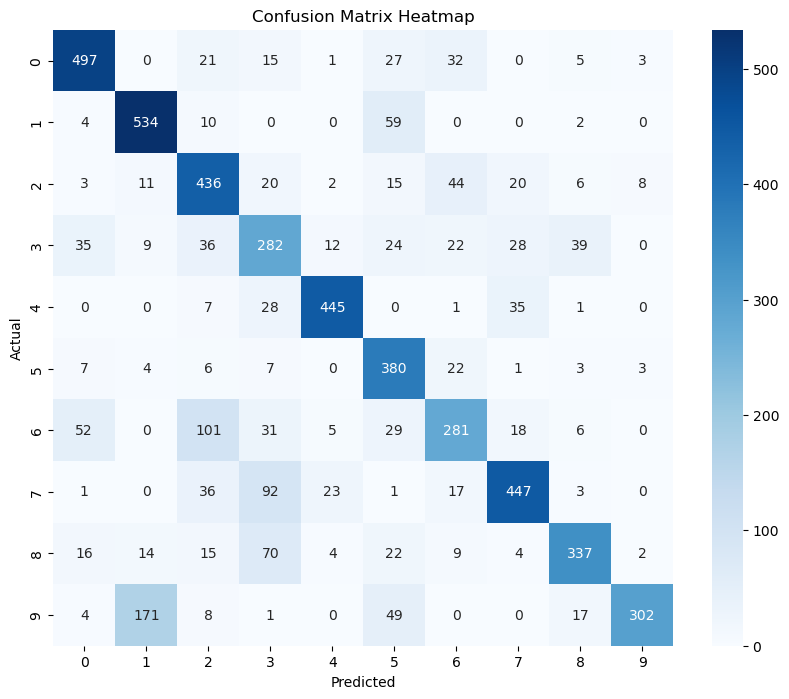

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [76]:
# Test the model
model.eval()
correct = 0
total = 0
confusion_matrix = torch.zeros(num_classes, num_classes)
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for i in range(len(labels)):
            confusion_matrix[labels[i]][predicted[i]] += 1

# Print overall test-set accuracy
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix.numpy(), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

class_idx_labels

> ## Interpreting the confusion Matrix Heatmap
> - Across classes 0 to 9, the range of true positives varies from 281 to 534.
> - Misclassifications are evident for each class. Notably, the most significant misclassification occurred between class 9 ('SeaLake') and class 1 ('Forest') with 171 cases. Following this, class 6 ('PermanentCrop') was misclassified as class 2 ('HerbaceousVegetation') with 101 cases.
> - Conversely, instances of perfect classification are prevalent, indicated by zeros on the heatmap. For example, class 9 ('SeaLake') was never misclassified as class 4 ('Industrial'), class 6 ('PermanentCrop'), or class 7 ('Residential').

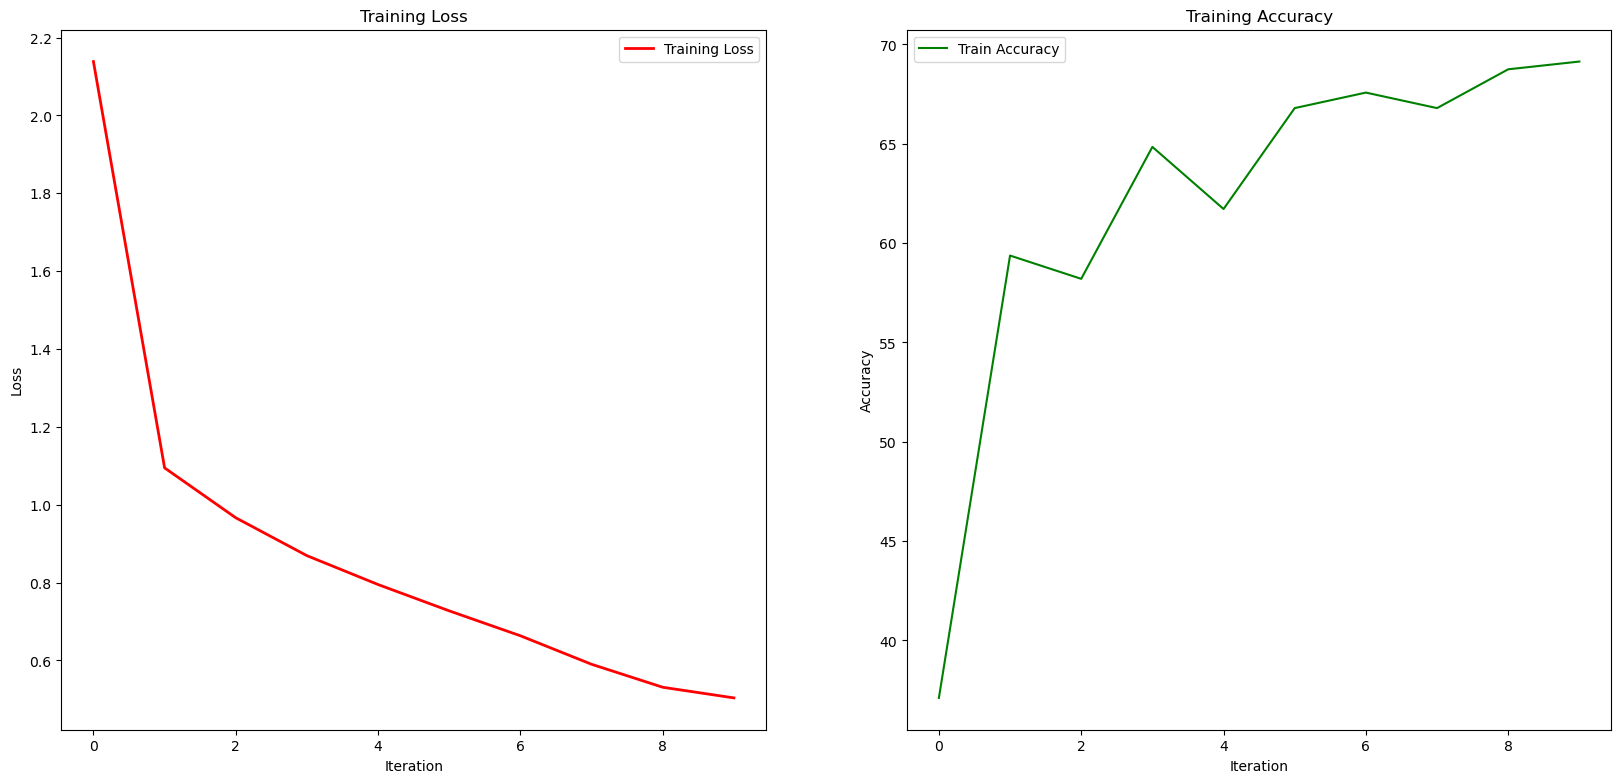

In [80]:
# ploting of loss and accuracy on the training and validation sets.
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot([i for i in running_loss_list],linewidth = 2,color = "r",label='Training Loss')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss")
plt.subplot(2,2,2)
plt.plot([j for j in accuracy],color = "green", label = 'Train Accuracy')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy")
plt.show()

> ## Tracking Training Loss and Training Accuracy Across Epochs

>- We conducted a total of 10 epochs, and a noticeable trend emerged in the final rounds. Both the training loss and training accuracy rates demonstrated improvement over the course of these epochs.
> - Specifically, the training loss began at over 2.0 and steadily decreased to below 1.0 by around the 2nd epoch. By the end of the training, it had reached approximately 0.50, reflecting a substantial decrease of about 75%.
> - Similarly, the training accuracy started at around 30%, quickly surpassed 50% in the first epoch, and eventually reached around 70% by the final epoch. Despite experiencing fluctuations during the middle epochs, it demonstrated an overall increase of more than 30%.
> - This analysis highlights the significant progress made in both training loss reduction and training accuracy enhancement throughout the training process.